# Análise - House Sales in King County, USA

Bom dia, boa tarde, boa noite. Esse notebook tem como objetivo fazer uma breve análise desse dataset público disponibilizado pelo Kaggle (https://www.kaggle.com/harlfoxem/housesalesprediction). Na verdade, tô usando ele para por em prática alguns estudos que tenho feito a respeito de plotagens com seaborn e matplotlib. Tenho tentando encontrar principalmente relações entre variáveis através de regressões lineares, buscando entender como uma variável afeta a outra. Qualquer dica estou super aberto pra receber! 

#### Carregando bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context("paper")
sns.set_style("darkgrid")
sns.set_palette("flare")

#### Iniciando análise

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Existem localizações em que a média do preço é mais alto?

In [4]:
df.sort_values(by='zipcode')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11553,4031700030,20150410T000000,299999.0,3,2.50,2380,9719,2.0,0,0,...,8,2380,0,2001,0,98001,47.2932,-122.283,2830,11505
18935,3353404265,20141231T000000,460000.0,3,2.50,2720,40813,2.0,0,0,...,8,2720,0,2001,0,98001,47.2619,-122.271,2250,40511
16355,2214800170,20150415T000000,295000.0,3,2.50,1940,10350,1.0,0,0,...,7,1420,520,1979,0,98001,47.3385,-122.256,1810,7800
6819,304100010,20141209T000000,269500.0,4,2.25,1700,7056,2.0,0,0,...,7,1700,0,1999,0,98001,47.3385,-122.262,1650,6025
18933,7696620100,20150422T000000,254999.0,3,1.00,1580,7560,1.0,0,0,...,7,1000,580,1976,0,98001,47.3318,-122.277,1580,7560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,871000435,20150509T000000,812000.0,4,2.00,2380,6122,1.0,0,2,...,8,1310,1070,1949,0,98199,47.6506,-122.405,1810,5202
10909,1370803925,20140903T000000,535000.0,2,2.00,1510,5133,1.5,0,0,...,7,1510,0,1939,0,98199,47.6415,-122.401,1470,6000
15505,6823100225,20150414T000000,700000.0,4,1.75,1870,6000,1.0,0,0,...,8,1670,200,1949,0,98199,47.6435,-122.399,1710,6000
10969,3271300955,20140703T000000,554729.0,4,2.50,2020,4350,2.0,0,0,...,9,1730,290,1943,0,98199,47.6503,-122.410,1620,5800


In [5]:
len(df.zipcode.unique())

70

Como a base de dados é bem grande (21613 registros) e o zipcode varia pouco (70 opções), decidi utilizar a mediana em vez da média. A presença de possíveis outliers afeta bastante o valor da média.

In [6]:
median_price_by_zip = df.groupby('zipcode').price.median().sort_values(ascending=False).reset_index()

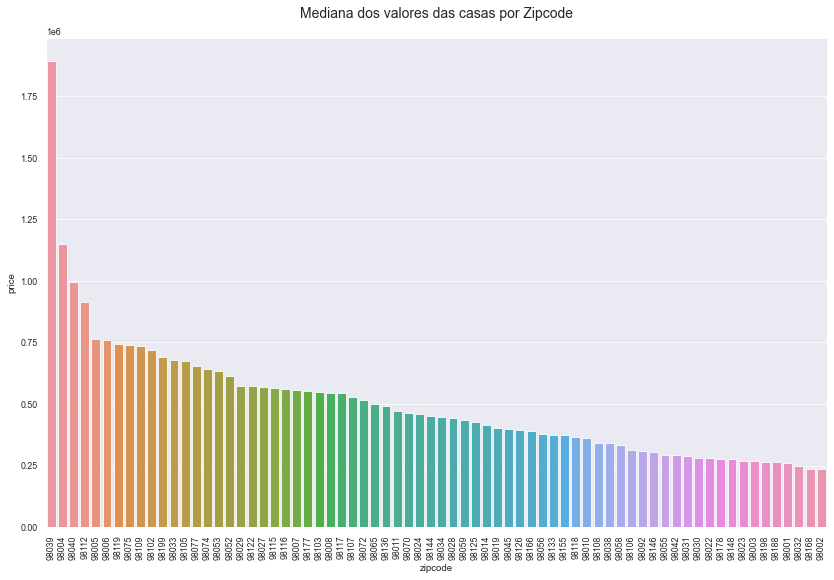

In [7]:
plt.rcParams['figure.figsize'] = [14, 9]

_ = sns.barplot(x='zipcode',
                y='price',
                data=median_price_by_zip,
                order=median_price_by_zip.zipcode)

_ = plt.xticks(rotation=90)

plt.title('Mediana dos valores das casas por Zipcode',
          fontdict={'fontsize':14},
          pad=20)

plt.show()

In [8]:
most_expensive_zips = median_price_by_zip[0:5]['zipcode'].astype('str').unique()
print(f'Zipcodes com valor médio de casas a venda mais alto:\n{most_expensive_zips}')

Zipcodes com valor médio de casas a venda mais alto:
['98039' '98004' '98040' '98112' '98005']


Ok! Encontramos os zipcodes que possuem as casas mais caras. Decidi fazer uma contagem dos zipcodes que aparecem na base, explicitando com a cor vermelha os zipcodes que possuem o valor médio de venda mais alto.

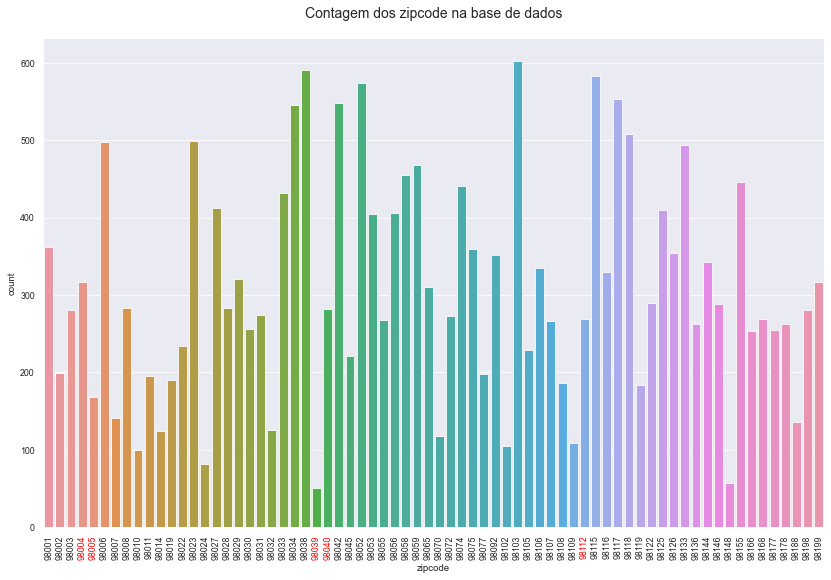

In [9]:
_ = sns.countplot(x='zipcode',
                  data=df)

for tick in _.get_xticklabels():
    if tick.get_text() in most_expensive_zips: tick.set_color('red')

plt.title('Contagem dos zipcode na base de dados',
          fontdict={'fontsize':14},
          pad=20)

plt.xticks(rotation=90)

plt.show()

Muito bagunçado! Melhor dar uma organizada.

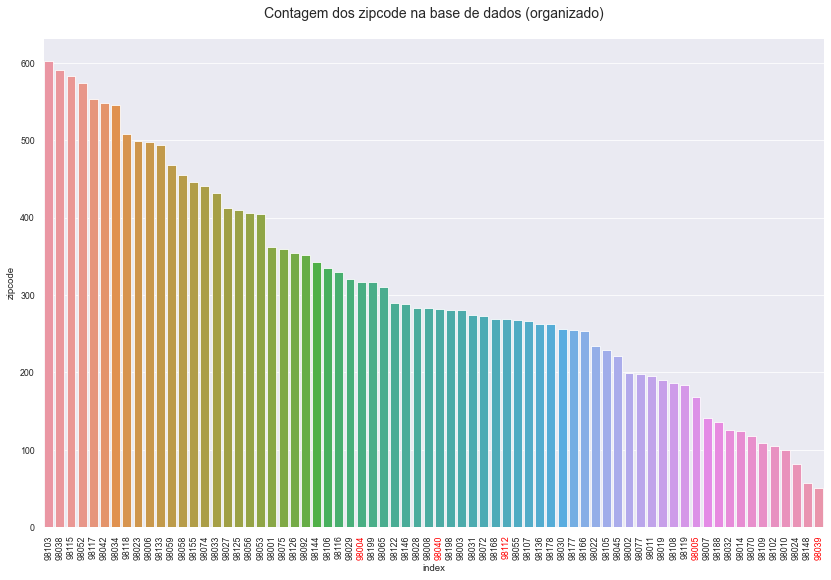

In [10]:
zipcode_counts = df.zipcode.value_counts().reset_index()

_ = sns.barplot(x='index',
                y='zipcode',
                data=zipcode_counts,
                order=zipcode_counts['index'])

for tick in _.get_xticklabels():
    if tick.get_text() in most_expensive_zips: tick.set_color('red')

plt.title('Contagem dos zipcode na base de dados (organizado)',
          fontdict={'fontsize':14},
          pad=20)

plt.xticks(rotation=90)

plt.show()

Agora vamos plotar uma correlação utilizando como base o Preço. O motivo de fazer isso é encontrar as características que mais afetam o preço final de uma casa.

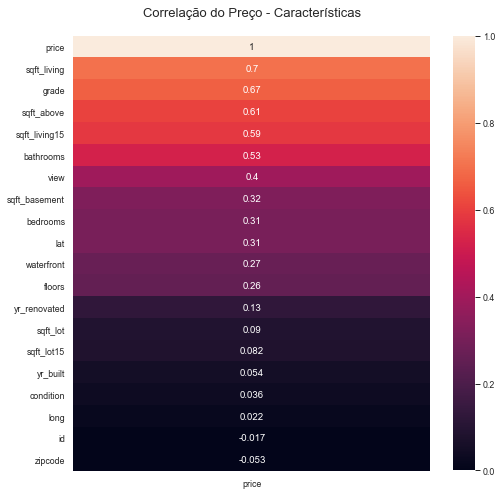

In [11]:
plt.rcParams['figure.figsize'] = [8, 8]

_ = sns.heatmap(df.corr()[['price']]
                .sort_values(by='price', ascending=False),
                vmin=0,
                vmax=1,
                annot=True);

_.set_title('Correlação do Preço - Características',
            fontdict={'fontsize':13},
            pad=20);

plt.show()

Encontramos então que sqft_living, grade, sqft_above, sqft_living15 e bathrooms são os que tem uma relação acima de 0.50 com o preço final da casa. Vamos encontrar então essas relações!

### Análise da Relação entre sqft_living e price

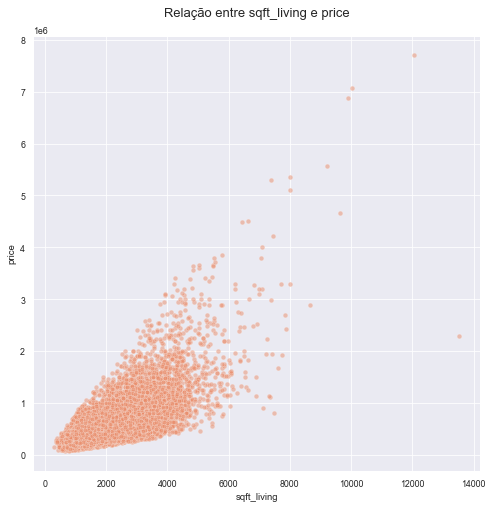

In [12]:
_ = sns.scatterplot(x='sqft_living',
                    y='price',
                    data=df,
                    alpha=0.5)

plt.title('Relação entre sqft_living e price',
          fontdict={'fontsize': 13},
          pad=20)

plt.show()

Aparentemente as duas variáveis possuem uma relação bem linear, isso é, quanto maior o valor do sqft_living, maior poderá ser o valor da casa.

Agora vamos a uma plotagem de uma reta que demonstra a relação entre as variáveis. Em seguida encontrar o valor do intercept e slope da função de relação linear. Através dessa função, podemos estimar o preço, caso tenhamos o tamanho do sqft_living e vice-versa.

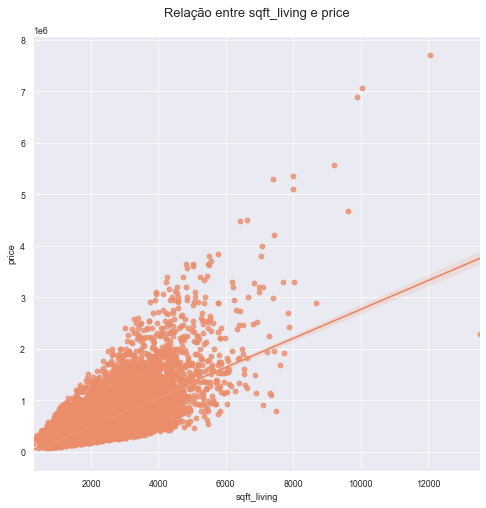

In [13]:
_ = sns.regplot(x='sqft_living',
                y='price',
                data=df)

plt.title('Relação entre sqft_living e price',
          fontdict={'fontsize': 13},
          pad=20)

plt.show()

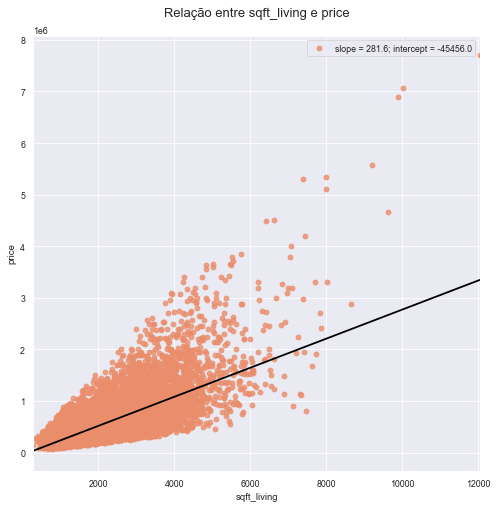

In [17]:
slope, intercept, r_value, pv, se = stats.linregress(df.sqft_living, df.price)
        
_ = sns.regplot(x="sqft_living",
                y="price",
                data=df,
                ci=None,
                line_kws={"color": "black"},
                label="slope = {0:.1f}; intercept = {1:.1f}".format(slope, intercept)).legend(loc="best")

plt.title('Relação entre sqft_living e price',
          fontdict={'fontsize': 13},
          pad=20)

plt.show()

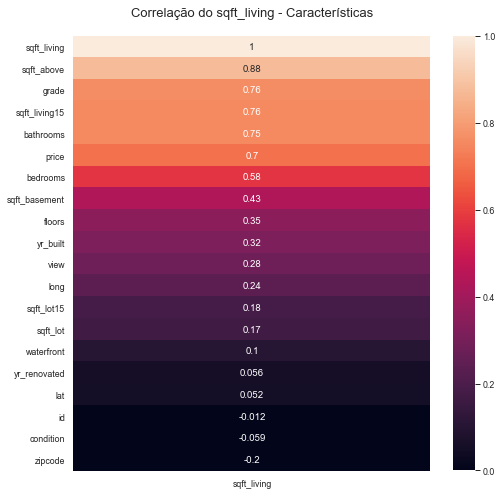

In [18]:
_ = sns.heatmap(df.corr()[['sqft_living']]
                .sort_values(by='sqft_living', ascending=False),
                vmin=0,
                vmax=1,
                annot=True);

_.set_title('Correlação do sqft_living - Características',
            fontdict={'fontsize':13},
            pad=20);

plt.show()

Vemos a forte relação de sqft_living com sqft_above e grade. Vamos plotar essas relações!

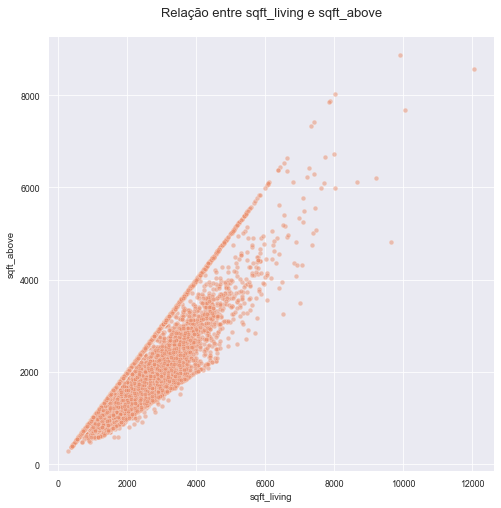

In [19]:
_ = sns.scatterplot(x='sqft_living',
                    y='sqft_above',
                    data=df,
                    alpha=0.5)

plt.title('Relação entre sqft_living e sqft_above',
          fontdict={'fontsize': 13},
          pad=20)

plt.show()

Apesar da relação ser bem linear, dá pra perceber que alguns valores são iguais. Isso se dá por conta da base do piso de baixo ser do mesmo tamanho do piso de cima. Mas isso são apenas suposições. A base não nos forcene informação clara do que as colunas significam.

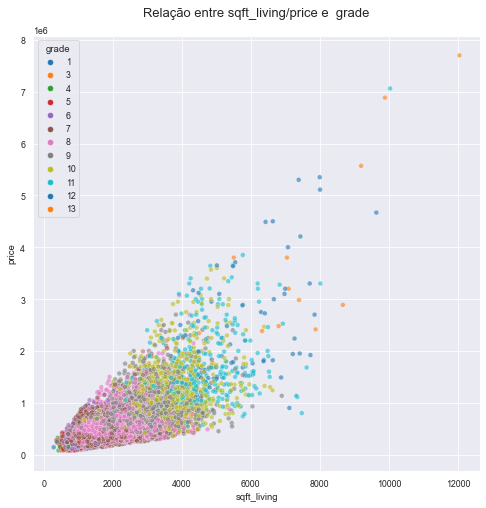

In [20]:
_ = sns.scatterplot(x='sqft_living',
                    y='price',
                    hue='grade',
                    data=df,
                    alpha=0.6,
                    palette="tab10")

plt.title('Relação entre sqft_living/price e  grade',
          fontdict={'fontsize': 13},
          pad=20)

plt.show()

Aparentemente, o grade da casa influencia também no preço, bastante. Geralmente casas com grade maior também são maiores.

#### Será que nos zipcode com os valores de venda mais altos, os sqrt_living são maiores que a média?

In [21]:
mean_sqft_living_by_zip = df.groupby('zipcode').sqft_living.median().sort_values(ascending=False).reset_index()

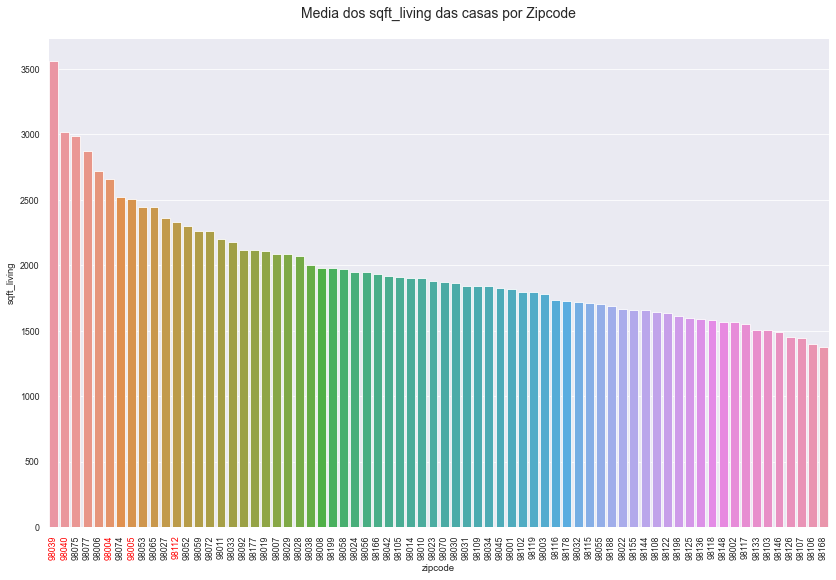

In [22]:
plt.rcParams['figure.figsize'] = [14, 9]

_ = sns.barplot(x='zipcode',
                y='sqft_living',
                data=mean_sqft_living_by_zip,
                order=mean_sqft_living_by_zip.zipcode)

for tick in _.get_xticklabels():
    if tick.get_text() in most_expensive_zips: tick.set_color('red')

_ = plt.xticks(rotation=90)

plt.title('Media dos sqft_living das casas por Zipcode',
          fontdict={'fontsize':14},
          pad=20)

plt.show()

Ok! Podemos perceber que o sqft_living afeta bem no valor final. Entretanto, ele não é a única variável que pode afetar o preço. Como podemos perceber acima, existem zipcodes que possuem um grande sqft_living mas não estão nos zipcodes com valores mais altos. Vamos agora analisar outra relação.

### Análise da Relação entre grade e price

In [23]:
df.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

Como grade possui um valor limitado de 1 a 13, não é adequado fazer um scatterplot, apesar de ser possível. Nesse caso, seria melhor realizar plot de contagem relacionada a outra variável. Nesse caso utilizaremos um boxplot, visto que nos dá varias informações de uma vez só. Antes, vamos fazer uma contagem da variável grade ter uma plotagem adequada.

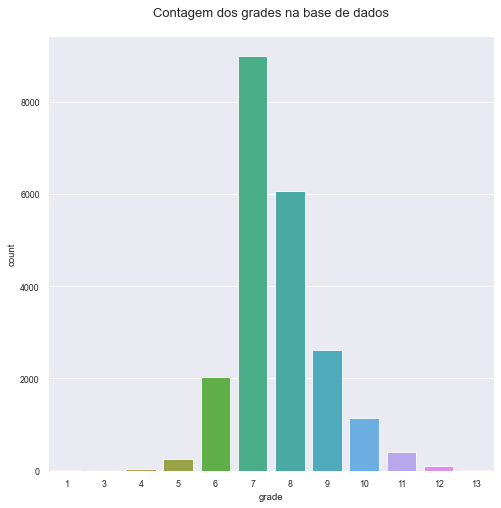

In [24]:
plt.rcParams['figure.figsize'] = [8, 8]

_ = sns.countplot(x='grade',
                  data=df)

plt.title('Contagem dos grades na base de dados',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

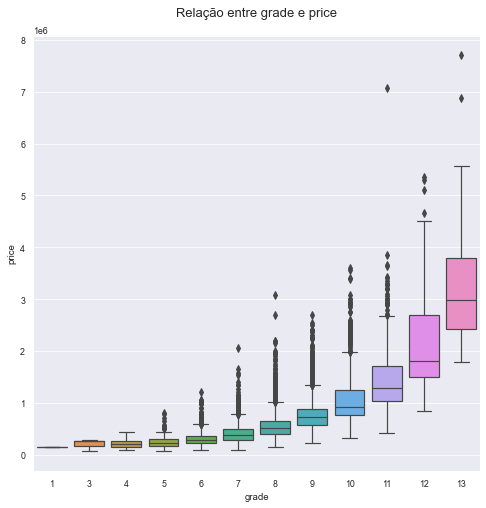

In [25]:
_ = sns.boxplot(x='grade',
                y='price',
                data=df)

plt.title('Relação entre grade e price',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

Com o gráfico acima podemos observar que a grade influencia bastante no valor final de uma casa (apesar da quantidade de outliers no boxplot). Dessa forma, grades mais altas se relacionam com valores mais altos.

### Análise Relação sqft_above e price

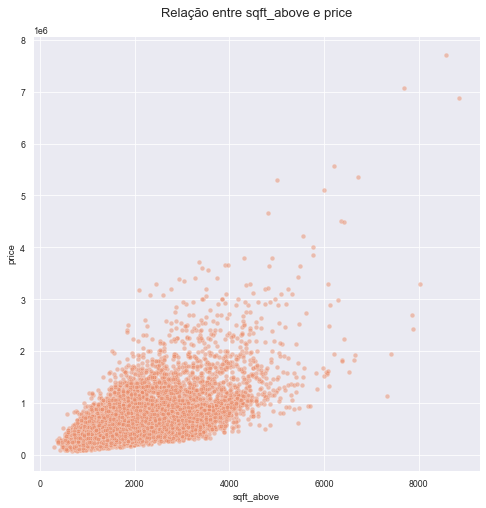

In [26]:
_ = sns.scatterplot(x='sqft_above',
                    y='price',
                    data=df,
                    alpha=0.5)

plt.title('Relação entre sqft_above e price',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

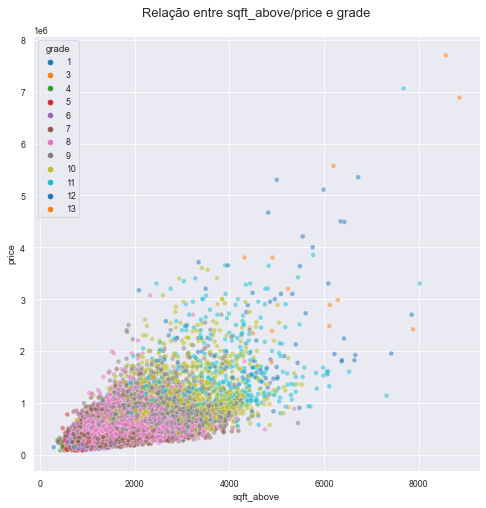

In [27]:
_ = sns.scatterplot(x='sqft_above',
                    y='price',
                    hue='grade',
                    data=df,
                    alpha=0.5,
                    palette="tab10")

plt.title('Relação entre sqft_above/price e grade',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

### Análise Relação sqft_living15 e price

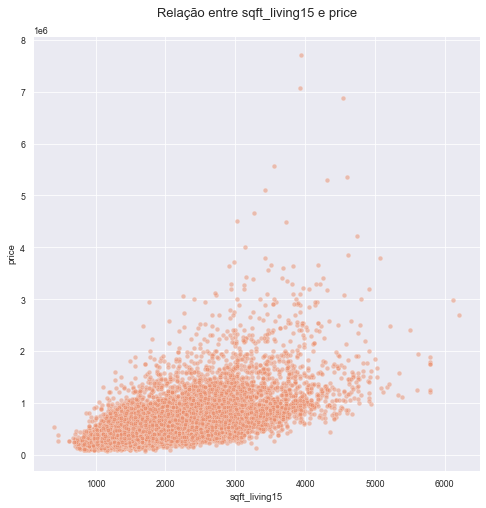

In [28]:
_ = sns.scatterplot(x='sqft_living15',
                    y='price',
                    data=df,
                    alpha=0.5)

plt.title('Relação entre sqft_living15 e price',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

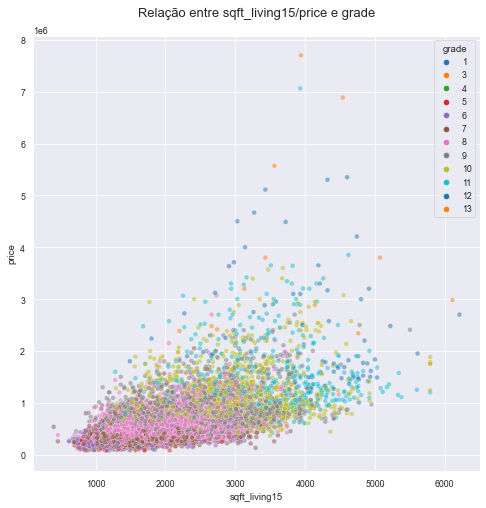

In [29]:
_ = sns.scatterplot(x='sqft_living15',
                    y='price',
                    hue='grade',
                    data=df,
                    alpha=0.5,
                    palette="tab10")

plt.title('Relação entre sqft_living15/price e grade',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

### Análise Relação bathrooms e price

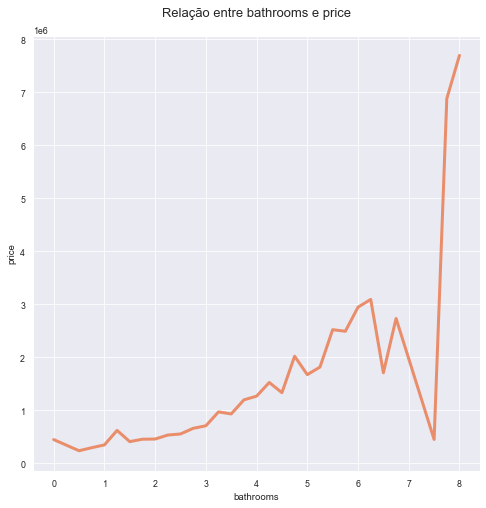

In [30]:
_ = sns.lineplot(x='bathrooms',
                 y='price',
                 data=df,
                 ci=None,
                 linewidth=3)

plt.title('Relação entre bathrooms e price',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

Wow! Algo muito esquisito acontece nesse plot. Por qual motivo as casas com dentre 6.25 até 7.75 e 8 diminuem bastante o preço? Será que casas com essa quantidade de bathrooms tendem a ter o preço menor? Vamos investigar.

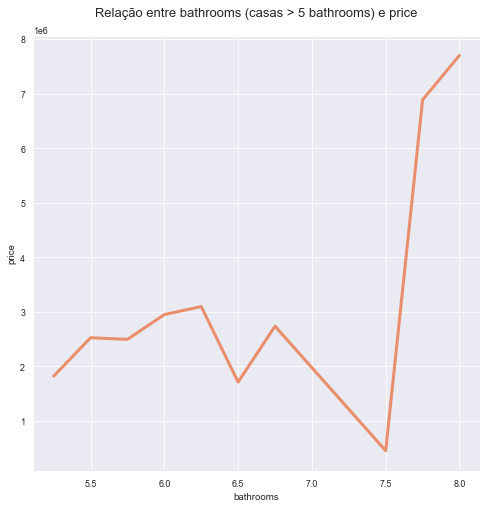

In [31]:
_ = sns.lineplot(x='bathrooms',
                 y='price',
                 data=df[df.bathrooms > 5],
                 ci=None,
                 palette="Set2",
                 linewidth=3)

plt.title('Relação entre bathrooms (casas > 5 bathrooms) e price',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

In [32]:
df_bathrooms = df.bathrooms.value_counts().reset_index()
df_bathrooms.sort_values(by='index').set_index('index')[5:]

,bathrooms
index,
5.00,21
5.25,13
5.50,10
5.75,4
6.00,6
6.25,2
6.50,2
6.75,2
7.50,1


Aqui já dá pra perceber algo. A partir do valor 5.50, a quantidade de casas com os valores seguintes são bem baixos, quase imperceptiveis mediante as outras contagens da base. Vamos tentar encontrar os maiores motivos que afetam os valores da casa nessa região

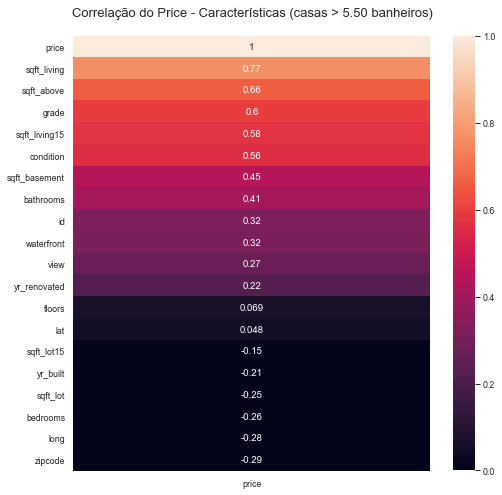

In [33]:
_ = sns.heatmap(df[df.bathrooms > 5.50].corr()[['price']]
                .sort_values(by='price', ascending=False),
                vmin=0,
                vmax=1,
                annot=True);

_.set_title('Correlação do Price - Características (casas > 5.50 banheiros)',
            fontdict={'fontsize':13},
            pad=20);

plt.show()

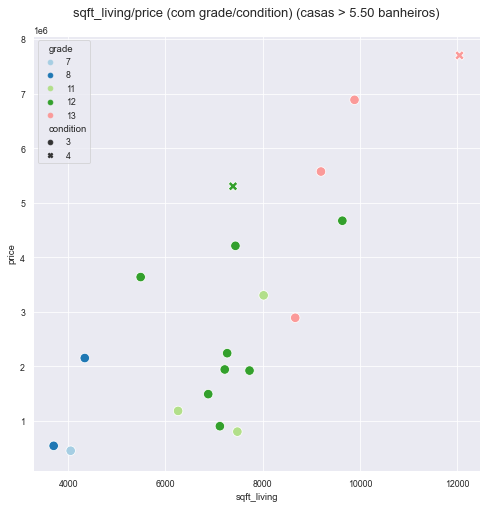

In [34]:
_ = sns.scatterplot(x='sqft_living',
                    y='price',
                    hue='grade',
                    style='condition',
                    data=df[df.bathrooms > 5.50],
                    palette="Paired",
                    s=90)

plt.title('sqft_living/price (com grade/condition) (casas > 5.50 banheiros)',
          fontdict={'fontsize': 13},
          pad=20)

plt.show()

Aqui percebemos que condition e grade possuem grande influencia nos valores mais baixos nesse intervalo de preços. Por conta disso e pelo fato de existirem poucas amostras de casas com mais de 6 banheiros, existe aquela relação estranha exemplificada no lineplot lá em cima.